# 问题三对五一黄金周期间的数据进行分析，判定寻找停车位的巡游车辆，并估算假期景区需要临时征用多少停车位才能满足需求？

In [1]:
import os
import sys

# 先导入 TensorFlow
import tensorflow as tf
import torch
print(torch.__version__)

# 检查 TensorFlow 版本
print("TensorFlow version:", tf.__version__)
print(sys.executable)
# 检查是否有可用的 GPU
try:
    tf_gpus = tf.config.list_physical_devices('GPU')
    if tf_gpus:
        print("GPUs available for TensorFlow:")
        for gpu in tf_gpus:
            print(gpu)
    else:
        print("No GPUs available for TensorFlow.")
except Exception as e:
    print("TensorFlow GPU check failed:", e)

# 再导入 PyTorch
try:
    import torch
    print("PyTorch version:", torch.__version__)
    # 检查是否有可用的 GPU
    torch_gpus = torch.cuda.device_count()
    if torch_gpus > 0:
        print(f"{torch_gpus} GPUs available for PyTorch:")
        for idx in range(torch_gpus):
            print(f"GPU {idx}: {torch.cuda.get_device_name(idx)}")
    else:
        print("No GPUs available for PyTorch.")

    # 检查cuda版本
    cuda_version = torch.version.cuda
    if cuda_version:
        print("CUDA version:", cuda_version)
    # 检查cuDNN版本
    cudnn_version = torch.backends.cudnn.version()
    if cudnn_version:
        print("cuDNN version:", cudnn_version)
except Exception as e:
    print("PyTorch GPU check failed:", e)

# 检查是否有可用的 GPU
if not tf_gpus and torch_gpus == 0:
    print("No GPUs available for both TensorFlow and PyTorch.")
    raise RuntimeError("No GPUs available for both TensorFlow and PyTorch.")

os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # 设置可见的 GPU 设备
# 运行 TensorFlow 和 PyTorch 的简单测试
try:
    # TensorFlow 测试
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
    c = tf.matmul(a, b)
    print("TensorFlow matrix multiplication result:\n", c.numpy())
    # PyTorch 测试
    a_torch = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
    b_torch = torch.tensor([[5.0, 6.0], [7.0, 8.0]])
    c_torch = torch.matmul(a_torch, b_torch)
    print("PyTorch matrix multiplication result:\n", c_torch.numpy())
except Exception as e:
    print("Error during TensorFlow or PyTorch test:", e)
    raise

# 检查当前gpu型号
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print(gpu)
else:
    print("No GPU found.")

if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("No GPU found.")

1.10.1+cu113
TensorFlow version: 2.10.0
c:\Users\hhui8\.conda\envs\Mathmatical\python.exe
GPUs available for TensorFlow:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PyTorch version: 1.10.1+cu113
1 GPUs available for PyTorch:
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA version: 11.3
cuDNN version: 8200
TensorFlow matrix multiplication result:
 [[19. 22.]
 [43. 50.]]
PyTorch matrix multiplication result:
 [[19. 22.]
 [43. 50.]]
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
# 导入数据

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置负号正常显示
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./题目及附件/附件2.csv', encoding='gbk')

# 查看列名
print("数据列名：", df.columns.tolist())

# 查看前几行数据
print("前5行数据：")
print(df.head())

# 根据实际列名提取5月1日至5月5日的所有数据
time_column = df.columns[1]  # 获取第二列的列名

# 将时间字符串转换为datetime格式
df[time_column] = pd.to_datetime(df[time_column])

# 提取5月1日0:00至5月6日的所有数据
start_date = '2024-05-01 00:00'
end_date = '2024-05-06 00:00'
mask = (df[time_column] >= start_date) & (df[time_column] < end_date)
data_gold = df.loc[mask]

# 显示结果
print(f"5月1日至5月6日的黄金数据共有 {len(data_gold)} 条")
print("前5条数据：")    
print(data_gold.head())

# 保存成CSV文件
data_gold.to_csv('./问题3支撑材料/五一黄金周数据.csv', index=False, encoding='gbk')
# 检查时间为2024年5月5日共有多少数据
data_55 = data_gold[data_gold['时间'].dt.date == pd.to_datetime('2024-05-05').date()]
print(f"时间为2024年5月5日的数据，共有 {len(data_55)} 条")

数据列名： ['方向', '时间', '车牌号', '交叉口']
前5行数据：
   方向                       时间       车牌号      交叉口
0   3  2024-04-03T14:39:08.632  AF5B7CEM  环西路-纬中路
1   1  2024-04-03T17:45:32.316   BK2IA84  环西路-纬中路
2   3  2024-04-03T15:09:04.087  AF4EC7FK  环西路-纬中路
3   2  2024-04-03T11:49:03.665   AF4MBB6  环西路-纬中路
4   3  2024-04-01T11:47:49.391   CBA7KCG  环西路-纬中路
5月1日至5月6日的黄金数据共有 1412072 条
前5条数据：
         方向                      时间       车牌号      交叉口
1685542   2 2024-05-02 13:13:42.809  EF9JDBBK  环西路-纬中路
1685543   2 2024-05-01 23:48:47.052  AF8MCE7K  环西路-纬中路
1685544   2 2024-05-02 11:16:21.320   EE8T3D9  环西路-纬中路
1685545   3 2024-05-01 18:21:45.458  AFA46A8K  环西路-纬中路
1685546   1 2024-05-01 20:13:11.594   AF26BCE  环西路-纬中路
时间为2024年5月5日的数据，共有 245602 条


In [3]:
data_golden = pd.read_csv('./问题3支撑材料/五一黄金周数据.csv', encoding='gbk')

# 将时间列转换为datetime格式，使用mixed格式来处理不同格式的时间字符串
data_golden['时间'] = pd.to_datetime(data_golden['时间'], format='mixed')

# 检查是否存在'无车牌'的数据
no_plate_data = data_golden[data_golden['车牌号'] == '无车牌']
if not no_plate_data.empty:
    print(f"存在'无车牌'的数据，共有 {len(no_plate_data)} 条")
else:
    print("不存在'无车牌'的数据")

# 检查时间为5月5日的数据共有多少条
data_55 = data_golden[data_golden['时间'].dt.date == pd.to_datetime('2024-05-05').date()]
print(f"时间为2024年5月5日的数据，共有 {len(data_55)} 条")

存在'无车牌'的数据，共有 30916 条
时间为2024年5月5日的数据，共有 245602 条


In [4]:
# 删除data_golden中的所有‘无车牌’的数据
data_golden = data_golden[data_golden['车牌号'] != '无车牌']
# 检查是否存在‘无车牌’的数据
no_plate_data = data_golden[data_golden['车牌号'] == '无车牌']
if not no_plate_data.empty:
    print(f"存在‘无车牌’的数据，共有 {len(no_plate_data)} 条")
else:
    print("不存在‘无车牌’的数据")


# 检查时间为2024年5月5日的数据共有多少条
data_55 = data_golden[data_golden['时间'].dt.date == pd.to_datetime('2024-05-05').date()]
print(f"时间为2024年5月5日的数据，共有 {len(data_55)} 条")

不存在‘无车牌’的数据
时间为2024年5月5日的数据，共有 240015 条


In [5]:
with tf.device('/GPU:0'):
    import pandas as pd
    import numpy as np

    # 查看列名（处理乱码问题）
    print("数据列名：", data_golden.columns.tolist())

    # 使用混合格式解析时间
    data_golden['时间'] = pd.to_datetime(data_golden['时间'], format='mixed')

    # 按照5月1日到5月5日每天的数据，进行切分，时间列具体到小时
    data_51 = data_golden[data_golden['时间'].dt.strftime('%Y-%m-%d') == '2024-05-01']
    data_52 = data_golden[data_golden['时间'].dt.strftime('%Y-%m-%d') == '2024-05-02']
    data_53 = data_golden[data_golden['时间'].dt.strftime('%Y-%m-%d') == '2024-05-03']
    data_54 = data_golden[data_golden['时间'].dt.strftime('%Y-%m-%d') == '2024-05-04']
    data_55 = data_golden[data_golden['时间'].dt.strftime('%Y-%m-%d') == '2024-05-05']

    # 保存处理结果
    data_51.to_csv('./问题3支撑材料/5月1日数据.csv', index=False, encoding='gbk')
    data_52.to_csv('./问题3支撑材料/5月2日数据.csv', index=False, encoding='gbk')
    data_53.to_csv('./问题3支撑材料/5月3日数据.csv', index=False, encoding='gbk')
    data_54.to_csv('./问题3支撑材料/5月4日数据.csv', index=False, encoding='gbk')
    data_55.to_csv('./问题3支撑材料/5月5日数据.csv', index=False, encoding='gbk')

数据列名： ['方向', '时间', '车牌号', '交叉口']


In [6]:
# with tf.device('/GPU:0'):    
# # 新增 cell：巡游车辆检测与可视化（速度阈值 15 km/h，重复访问：1小时内≥3次）
#     import os
#     import pandas as pd
#     import numpy as np
#     import matplotlib.pyplot as plt

#     DATA_DIR = r"f:\Math_model\CUMCM2024Problems\E\问题3支撑材料"
#     FILES = [os.path.join(DATA_DIR, fn) for fn in ["5月1日数据.csv","5月2日数据.csv","5月3日数据.csv","5月4日数据.csv","5月5日数据.csv"]]

#     # 参数（可调整）
#     SPEED_THRESHOLD_KMH = 15.0   # 低速判定阈值（km/h）
#     REPEAT_WINDOW_MIN = 60       # 重复出现窗口（分钟）
#     MIN_REPEAT_COUNT = 3         # 窗口内至少出现次数
#     DIST_KM_DEFAULT = 0.5        # 默认相邻路口距离（km），若有精确地图可替换为字典
#     BUFFER_MIN = 15              # 报告时间区间前后扩展分钟（用于并发统计）
#     AGG_FREQ_MIN = 5             # 并发统计时间步长（分钟）

#     # 载入并合并
#     dfs = []
#     for path in FILES:
#         if not os.path.exists(path):
#             print("未找到文件:", path)
#             continue
#         try:
#             df = pd.read_csv(path, encoding='gbk')
#         except Exception:
#             df = pd.read_csv(path, encoding='utf-8', errors='ignore')
#         dfs.append(df)
#     if not dfs:
#         raise FileNotFoundError("未读取到任何数据文件，请检查路径。")
#     data = pd.concat(dfs, ignore_index=True)

#     # 统一列名（容错）
#     orig_cols = data.columns.tolist()
#     # 期望列：方向, 时间, 车牌号, 交叉口 （有时编码乱码，请用位置索引）
#     if "时间" in orig_cols and "车牌号" in orig_cols:
#         data = data.rename(columns={c:c for c in orig_cols})
#     else:
#         # 采用位置映射（根据你提供的文件列顺序）
#         # 第一列方向, 第二列时间, 第三列车牌, 第四列交叉口
#         mapping = {}
#         if len(orig_cols) >= 4:
#             mapping = {orig_cols[0]:"方向", orig_cols[1]:"时间", orig_cols[2]:"车牌号", orig_cols[3]:"交叉口"}
#             data = data.rename(columns=mapping)
#         else:
#             raise RuntimeError(f"列数异常: {orig_cols}")

#     # 解析时间，去除无牌记录
#     data['时间'] = pd.to_datetime(data['时间'], errors='coerce')
#     data = data.dropna(subset=['时间'])
#     data = data[~data['车牌号'].isin(['无车牌','', None])]
#     data = data.sort_values(['车牌号','时间']).reset_index(drop=True)

#     # 可选：自定义路口之间距离字典（如果有精确值，可在这里填充）
#     # distance_map = {('K1','K2'):0.8, ...}
#     distance_map = {}  # 为空时使用 DIST_KM_DEFAULT

#     def get_distance_km(k1, k2):
#         if (k1, k2) in distance_map:
#             return distance_map[(k1,k2)]
#         if (k2, k1) in distance_map:
#             return distance_map[(k2,k1)]
#         if pd.isna(k1) or pd.isna(k2) or k1==k2:
#             return 0.0
#         return DIST_KM_DEFAULT

#     # 计算每辆车相邻记录之间的速度（当交叉口不同才计算）
#     low_speed_events = []  # 每条记录的低速边事件（车牌, t_prev, t_cur, k_prev, k_cur, speed_kmh）
#     for plate, g in data.groupby('车牌号'):
#         g = g.sort_values('时间').reset_index()
#         for i in range(1, len(g)):
#             t_prev = g.loc[i-1, '时间']
#             t_cur = g.loc[i, '时间']
#             k_prev = g.loc[i-1, '交叉口'] if '交叉口' in g.columns else None
#             k_cur  = g.loc[i,   '交叉口'] if '交叉口' in g.columns else None
#             if pd.isna(t_prev) or pd.isna(t_cur):
#                 continue
#             dt_hours = (t_cur - t_prev).total_seconds() / 3600.0
#             if dt_hours <= 0:
#                 continue
#             dist_km = get_distance_km(k_prev, k_cur)
#             if dist_km <= 0:
#                 continue
#             speed_kmh = dist_km / dt_hours
#             if speed_kmh <= SPEED_THRESHOLD_KMH:
#                 low_speed_events.append({
#                     '车牌号': plate, 't_prev': t_prev, 't_cur': t_cur,
#                     'k_prev': k_prev, 'k_cur': k_cur, 'speed_kmh': speed_kmh
#                 })
#     low_speed_df = pd.DataFrame(low_speed_events)
#     low_speed_df.to_csv(os.path.join(DATA_DIR, 'low_speed_events.csv'), index=False, encoding='utf-8')

#     # 重复出现检测：同一车牌在同一交叉口1小时内出现>=3次 -> 记录为重复窗口
#     repeat_windows = []  # plate, intersection, start, end, count
#     for plate, g in data.groupby('车牌号'):
#         for intersection, sub in g.groupby('交叉口'):
#             times = sub['时间'].sort_values().tolist()
#             if len(times) < MIN_REPEAT_COUNT:
#                 continue
#             # 双指针找窗口
#             i = 0
#             for j in range(len(times)):
#                 while i <= j and (times[j] - times[i]).total_seconds()/60.0 > REPEAT_WINDOW_MIN:
#                     i += 1
#                 cnt = j - i + 1
#                 if cnt >= MIN_REPEAT_COUNT:
#                     repeat_windows.append({
#                         '车牌号': plate,
#                         '交叉口': intersection,
#                         'start': times[i],
#                         'end': times[j],
#                         'count': cnt
#                     })
#                     # 移动 i 向前以避免重复记录完全相同窗口
#                     i += 1

#     repeat_df = pd.DataFrame(repeat_windows)
#     repeat_df.to_csv(os.path.join(DATA_DIR, 'repeat_visit_windows.csv'), index=False, encoding='utf-8')

#     # 对每个重复窗口，判断是否同时存在低速事件（时间上有交集）
#     cruise_events = []
#     if not repeat_df.empty and not low_speed_df.empty:
#         for _, rw in repeat_df.iterrows():
#             plate = rw['车牌号']
#             s = pd.to_datetime(rw['start'])
#             e = pd.to_datetime(rw['end'])
#             # 扩展窗口一点
#             s_ext = s - pd.Timedelta(minutes=BUFFER_MIN)
#             e_ext = e + pd.Timedelta(minutes=BUFFER_MIN)
#             # 在 low_speed_df 中查找该车是否有低速事件与窗口有时间交集
#             low_for_plate = low_speed_df[low_speed_df['车牌号']==plate]
#             intersecting = low_for_plate[
#                 (low_for_plate['t_prev'] <= e_ext) & (low_for_plate['t_cur'] >= s_ext)
#             ]
#             if not intersecting.empty:
#                 cruise_events.append({
#                     '车牌号': plate,
#                     '交叉口': rw['交叉口'],
#                     'start': s_ext, 'end': e_ext,
#                     'repeat_count': rw['count'],
#                     'low_speed_count': len(intersecting)
#                 })
#     cruise_df = pd.DataFrame(cruise_events)
#     cruise_df.to_csv(os.path.join(DATA_DIR, 'detected_cruise_events.csv'), index=False, encoding='utf-8')

#     # 判定巡游车辆（若任意一次 cruise_event 出现则该车为巡游车）
#     cruise_plates = cruise_df['车牌号'].unique().tolist() if not cruise_df.empty else []
#     print("检测到巡游车辆（去重）数量：", len(cruise_plates))

#     # 并发统计：把每个 cruise_event 看作区间，统计任意时刻并发巡游车辆数
#     if cruise_df.empty:
#         print("未检测到巡游事件，请调整参数（距离、速度阈值或重复窗口）。")
#     else:
#         global_start = pd.to_datetime(cruise_df['start']).min().floor('T')
#         global_end = pd.to_datetime(cruise_df['end']).max().ceil('T')
#         time_index = pd.date_range(start=global_start, end=global_end, freq=f'{AGG_FREQ_MIN}min')
#         concurrency = pd.Series(0, index=time_index)
#         # 每个事件计为同时占用 1
#         for _, r in cruise_df.iterrows():
#             s = pd.to_datetime(r['start'])
#             e = pd.to_datetime(r['end'])
#             mask = (time_index >= s) & (time_index <= e)
#             concurrency.loc[mask] += 1
#         peak = int(concurrency.max())
#         peak_time = concurrency.idxmax()
#         print(f"巡游并发峰值 = {peak} 辆，发生时间 ≈ {peak_time}")

#         # 保存并发序列
#         concurrency.reset_index().rename(columns={'index':'time',0:'concurrent_cruisers'}).to_csv(
#             os.path.join(DATA_DIR,'cruise_concurrency_time_series.csv'), index=False, encoding='utf-8'
#         )

#         # 绘图并保存
#         plt.figure(figsize=(12,4))
#         plt.plot(concurrency.index, concurrency.values, drawstyle='steps-post')
#         plt.xlabel('时间')
#         plt.ylabel('并发巡游车辆数')
#         plt.title('巡游车辆并发数随时间变化')
#         plt.grid(True)
#         plt.tight_layout()
#         plt.savefig(os.path.join(DATA_DIR, 'cruise_concurrency.png'), dpi=150)
#         plt.show()

#         # 导出巡游车辆清单（唯一车牌）
#         pd.DataFrame({'车牌号':cruise_plates}).to_csv(os.path.join(DATA_DIR,'cruise_plates_list.csv'), index=False, encoding='utf-8')

#     # 简要统计输出文件位置
#     print("已保存：low_speed_events.csv, repeat_visit_windows.csv, detected_cruise_events.csv, cruise_concurrency_time_series.csv, cruise_plates_list.csv （在）", DATA_DIR)

检测到巡游车辆（去重）数量： 12268


C:\Users\hhui8\AppData\Local\Temp\ipykernel_21912\2059627515.py:151: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  global_start = pd.to_datetime(cruise_df['start']).min().floor('T')
C:\Users\hhui8\AppData\Local\Temp\ipykernel_21912\2059627515.py:152: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  global_end = pd.to_datetime(cruise_df['end']).max().ceil('T')


巡游并发峰值 = 783 辆，发生时间 ≈ 2024-05-01 22:10:00


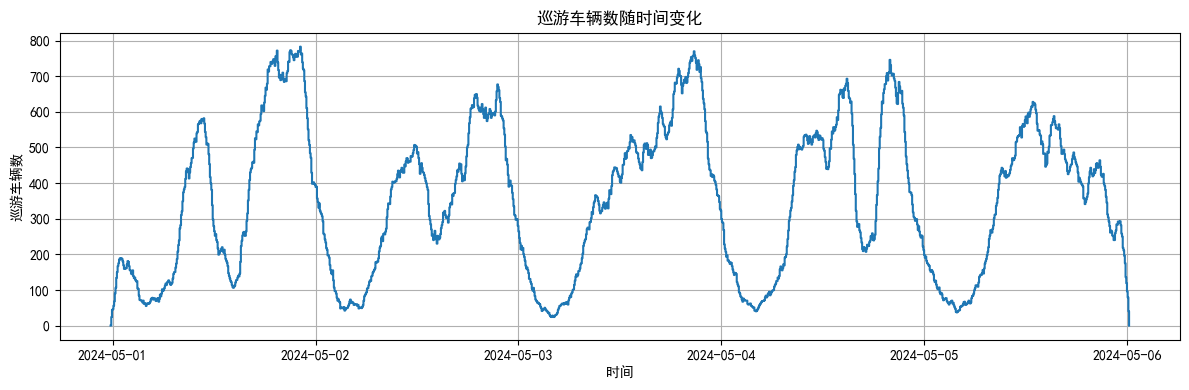

已保存：low_speed_events.csv, repeat_visit_windows.csv, detected_cruise_events.csv, cruise_concurrency_time_series.csv, cruise_plates_list.csv （在） f:\Math_model\CUMCM2024Problems\E\问题3支撑材料


In [7]:
with tf.device('/GPU:0'):
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    DATA_DIR = r"f:\Math_model\CUMCM2024Problems\E\问题3支撑材料"
    FILES = [os.path.join(DATA_DIR, fn) for fn in ["5月1日数据.csv","5月2日数据.csv","5月3日数据.csv","5月4日数据.csv","5月5日数据.csv"]]

    # 参数（可调）
    SPEED_THRESHOLD_KMH = 15.0
    REPEAT_WINDOW_MIN = 60
    MIN_REPEAT_COUNT = 3
    DIST_KM_DEFAULT = 0.5
    BUFFER_MIN = 15
    AGG_FREQ_MIN = 5

    # 载入并合并（尽量一次读入）
    dfs = []
    for path in FILES:
        if not os.path.exists(path):
            print("未找到文件:", path)
            continue
        try:
            dfs.append(pd.read_csv(path, encoding='gbk'))
        except Exception:
            dfs.append(pd.read_csv(path, encoding='utf-8', errors='ignore'))
    if not dfs:
        raise FileNotFoundError("未读取到任何数据文件，请检查路径。")
    data = pd.concat(dfs, ignore_index=True)

    # 统一列名并预处理
    orig_cols = data.columns.tolist()
    if "时间" in orig_cols and "车牌号" in orig_cols:
        pass
    else:
        if len(orig_cols) >= 4:
            data = data.rename(columns={orig_cols[0]:"方向", orig_cols[1]:"时间", orig_cols[2]:"车牌号", orig_cols[3]:"交叉口"})
        else:
            raise RuntimeError(f"列数异常: {orig_cols}")

    data['时间'] = pd.to_datetime(data['时间'], errors='coerce')
    data = data.dropna(subset=['时间'])
    data = data[~data['车牌号'].isin(['无车牌','', None])]
    data = data.sort_values(['车牌号','时间']).reset_index(drop=True)

    # 准备距离映射（支持双向）
    distance_map = {}  # 若有真实距离可填充
    map_str = {}
    for (a,b),v in distance_map.items():
        map_str[f"{a}|{b}"]=v
        map_str[f"{b}|{a}"]=v

    # 向量化计算相邻速度（在同一车牌下）
    # 使用 groupby shift 得到前一条记录对应的时间和交叉口
    data['t_prev'] = data.groupby('车牌号')['时间'].shift(1)
    data['k_prev'] = data.groupby('车牌号')['交叉口'].shift(1)

    # 计算时间差（小时）
    dt_sec = (data['时间'] - data['t_prev']).dt.total_seconds()
    data['dt_hours'] = dt_sec / 3600.0

    # 构造键用于查距离（字符串拼接，缺失或相同则距离设为0）
    kprev = data['k_prev'].fillna('').astype(str)
    kcur = data['交叉口'].fillna('').astype(str)
    key = (kprev + '|' + kcur)
    data['dist_km'] = key.map(map_str)
    data['dist_km'] = data['dist_km'].fillna(DIST_KM_DEFAULT)
    # 若前后路口相同或任一为空，设为0以跳过
    same_or_missing = (data['k_prev'].isna()) | (data['交叉口'].isna()) | (data['k_prev']==data['交叉口'])
    data.loc[same_or_missing, 'dist_km'] = 0.0

    # 计算速度并筛选低速事件
    with np.errstate(divide='ignore', invalid='ignore'):
        data['speed_kmh'] = data['dist_km'] / data['dt_hours']
    low_speed_mask = (data['dist_km'] > 0) & (data['dt_hours'] > 0) & (data['speed_kmh'] <= SPEED_THRESHOLD_KMH)
    low_speed_df = data.loc[low_speed_mask, ['车牌号','t_prev','时间','k_prev','交叉口','speed_kmh']].rename(columns={'时间':'t_cur'})
    low_speed_df.to_csv(os.path.join(DATA_DIR, 'low_speed_events.csv'), index=False, encoding='utf-8')

    # 重复出现检测（每个 车牌+交叉口 用 numpy.searchsorted 加速）
    repeat_windows = []
    grp = data.groupby(['车牌号','交叉口'], sort=False)
    for (plate, inter), sub in grp:
        times = sub['时间'].sort_values().values
        if times.size < MIN_REPEAT_COUNT:
            continue
        # 转为秒数整数数组，使用 searchsorted 获得窗口右端
        arr = times.astype('datetime64[s]').astype(np.int64)
        # 对每起点 i 找到最右侧 j 使 arr[j] <= arr[i] + REPEAT_WINDOW_MIN*60
        # j = searchsorted(arr, arr[i] + window_seconds, side='right') 返回第一个 > target 的索引
        window_s = REPEAT_WINDOW_MIN * 60
        j_idx = np.searchsorted(arr, arr + window_s, side='right')
        # counts = j_idx - np.arange(len(arr))
        starts = np.where((j_idx - np.arange(len(arr))) >= MIN_REPEAT_COUNT)[0]
        # 记录窗口，移动 i 同原算法避免重复完全一致窗口
        prev_i = -1
        for i in starts:
            if i <= prev_i:
                continue
            j = j_idx[i] - 1
            cnt = j - i + 1
            repeat_windows.append({'车牌号': plate, '交叉口': inter, 'start': pd.to_datetime(times[i]), 'end': pd.to_datetime(times[j]), 'count': int(cnt)})
            prev_i = i

    repeat_df = pd.DataFrame(repeat_windows)
    repeat_df.to_csv(os.path.join(DATA_DIR, 'repeat_visit_windows.csv'), index=False, encoding='utf-8')

    # 判断重复窗口与低速事件是否有时间交集（向量化合并）
    cruise_events = []
    if not repeat_df.empty and not low_speed_df.empty:
        # 扩展窗口
        repeat_df = repeat_df.reset_index().rename(columns={'index':'rw_id'})
        repeat_df['start_ext'] = pd.to_datetime(repeat_df['start']) - pd.Timedelta(minutes=BUFFER_MIN)
        repeat_df['end_ext'] = pd.to_datetime(repeat_df['end']) + pd.Timedelta(minutes=BUFFER_MIN)

        # 合并：一次性选择唯一列，避免重复列名导致错误
        merged = pd.merge(
            repeat_df[['rw_id','车牌号','交叉口','start_ext','end_ext','count']],
            low_speed_df[['车牌号','t_prev','t_cur']],
            on='车牌号',
            how='left'
        )

        # 筛选时间重叠
        mask_overlap = (merged['t_prev'] <= merged['end_ext']) & (merged['t_cur'] >= merged['start_ext'])
        merged_overlap = merged[mask_overlap].copy()
        if not merged_overlap.empty:
            grouped = merged_overlap.groupby('rw_id').size().reset_index(name='low_speed_count')
            join = pd.merge(repeat_df, grouped, on='rw_id', how='inner')
            for _, r in join.iterrows():
                cruise_events.append({
                    '车牌号': r['车牌号'],
                    '交叉口': r['交叉口'],
                    'start': r['start_ext'],
                    'end': r['end_ext'],
                    'repeat_count': int(r['count']),
                    'low_speed_count': int(r['low_speed_count'])
                })

    cruise_df = pd.DataFrame(cruise_events)
    cruise_df.to_csv(os.path.join(DATA_DIR, 'detected_cruise_events.csv'), index=False, encoding='utf-8')

    # 去重巡游车牌
    cruise_plates = cruise_df['车牌号'].unique().tolist() if not cruise_df.empty else []
    print("检测到巡游车辆（去重）数量：", len(cruise_plates))

    # 并发统计（保持原输出形式）
    if cruise_df.empty:
        print("未检测到巡游事件，请调整参数（距离、速度阈值或重复窗口）。")
    else:
        global_start = pd.to_datetime(cruise_df['start']).min().floor('T')
        global_end = pd.to_datetime(cruise_df['end']).max().ceil('T')
        time_index = pd.date_range(start=global_start, end=global_end, freq=f'{AGG_FREQ_MIN}min')
        concurrency = pd.Series(0, index=time_index)
        # 为加速，用 numpy 索引方式：对每事件找到起止位置然后累加
        times_vals = time_index.values.astype('datetime64[ns]').astype(np.int64)
        for _, r in cruise_df.iterrows():
            s = np.int64(pd.to_datetime(r['start']).value)
            e = np.int64(pd.to_datetime(r['end']).value)
            # 找到 time_index 对应的位置
            i = np.searchsorted(times_vals, s, side='left')
            j = np.searchsorted(times_vals, e, side='right') - 1
            if i <= j:
                concurrency.iloc[i:j+1] += 1
        peak = int(concurrency.max())
        peak_time = concurrency.idxmax()
        print(f"巡游并发峰值 = {peak} 辆，发生时间 ≈ {peak_time}")

        concurrency.reset_index().rename(columns={'index':'time',0:'concurrent_cruisers'}).to_csv(
            os.path.join(DATA_DIR,'cruise_concurrency_time_series.csv'), index=False, encoding='utf-8'
        )

        plt.figure(figsize=(12,4))
        plt.plot(concurrency.index, concurrency.values, drawstyle='steps-post')
        plt.xlabel('时间')
        plt.ylabel('巡游车辆数')
        plt.title('巡游车辆数随时间变化')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(DATA_DIR, 'cruise_concurrency.png'), dpi=150)
        plt.show()

        pd.DataFrame({'车牌号':cruise_plates}).to_csv(os.path.join(DATA_DIR,'cruise_plates_list.csv'), index=False, encoding='utf-8')

    print("已保存：low_speed_events.csv, repeat_visit_windows.csv, detected_cruise_events.csv, cruise_concurrency_time_series.csv, cruise_plates_list.csv （在）", DATA_DIR)


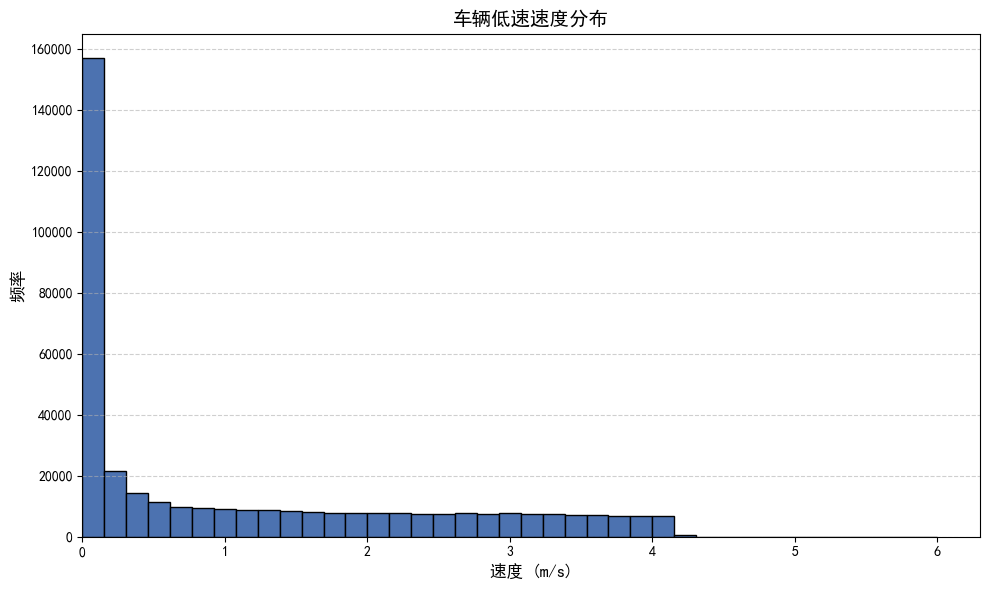

已保存： f:\Math_model\CUMCM2024Problems\E\问题3支撑材料\low_speed_speed_hist.png


In [8]:
# ...existing code...
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

DATA_DIR = r"f:\Math_model\CUMCM2024Problems\E\问题3支撑材料"
csv_path = os.path.join(DATA_DIR, "low_speed_events.csv")

# 读取低速事件表（已在前面单元生成）
df = pd.read_csv(csv_path, encoding='utf-8', engine='python')

# 获取速度，转换为 m/s（如果只有 km/h 列）
if 'speed_kmh' in df.columns:
    speeds_ms = pd.to_numeric(df['speed_kmh'], errors='coerce') / 3.6
elif 'speed_m_s' in df.columns:
    speeds_ms = pd.to_numeric(df['speed_m_s'], errors='coerce')
else:
    # 如无直接速度列，尝试用 dist_km 与时间差计算
    if {'t_prev','t_cur','dist_km'}.issubset(df.columns):
        t_prev = pd.to_datetime(df['t_prev'])
        t_cur  = pd.to_datetime(df['t_cur'])
        dt_s = (t_cur - t_prev).dt.total_seconds().replace(0, np.nan)
        speeds_ms = pd.to_numeric(df['dist_km'], errors='coerce') * 1000.0 / dt_s
    else:
        raise RuntimeError("未找到速度列或用于计算速度的列（t_prev,t_cur,dist_km）。")

speeds_ms = speeds_ms.dropna()
if speeds_ms.empty:
    raise RuntimeError("速度数据为空，无法绘图。")

# 绘图参数（可按需调整）
figsize = (10, 6)
bins = np.linspace(0, max(6, speeds_ms.quantile(0.99)*1.1), 40)  # 聚焦常见低速区间
color = '#4C72B0'
edgecolor = 'black'

plt.figure(figsize=figsize)
n, bins, patches = plt.hist(speeds_ms, bins=bins, color=color, edgecolor=edgecolor)
plt.xlabel('速度 (m/s)', fontsize=12)
plt.ylabel('频率', fontsize=12)
plt.title('车辆低速速度分布', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlim(left=0)
plt.tight_layout()

out_png = os.path.join(DATA_DIR, 'low_speed_speed_hist.png')
plt.savefig(out_png, dpi=150)
plt.show()

print("已保存：", out_png)
#

In [9]:
# 按日期统计巡游车辆数量
if not cruise_df.empty:
    # 提取日期并去重统计
    cruise_df['date'] = pd.to_datetime(cruise_df['start']).dt.date
    daily_cruise_counts = cruise_df.groupby('date')['车牌号'].nunique().reset_index()
    daily_cruise_counts.columns = ['日期', '巡游车辆数量']
    
    # 保存结果到CSV文件
    output_path = os.path.join(DATA_DIR, 'daily_cruise_counts.csv')
    daily_cruise_counts.to_csv(output_path, index=False, encoding='utf-8')
    print(f"每天的巡游车辆数量已保存到: {output_path}")
    
    # 显示结果
    print("每天的巡游车辆数量：")
    print(daily_cruise_counts)
else:
    print("未检测到巡游事件，请调整参数（距离、速度阈值或重复窗口）。")

每天的巡游车辆数量已保存到: f:\Math_model\CUMCM2024Problems\E\问题3支撑材料\daily_cruise_counts.csv
每天的巡游车辆数量：
           日期  巡游车辆数量
0  2024-04-30      24
1  2024-05-01    3285
2  2024-05-02    3244
3  2024-05-03    3294
4  2024-05-04    3108
5  2024-05-05    3073


In [10]:
with tf.device('/GPU:0'):
    import pandas as pd
    import numpy as np
    import math
    from scipy.special import factorial
    from scipy import special

    def calculate_queueing_metrics():
        # 读取每日巡游车辆数量数据
        df = pd.read_csv('问题3支撑材料/daily_cruise_counts.csv')
        
        # 计算平均每日巡游车辆数（作为平均到达率λ的基础）
        avg_daily_cruisers = df['巡游车辆数量'].mean()
        
        # 假设：
        # - 每辆车平均停车2小时（服务率μ = 0.5辆/小时）
        # - 现有停车位100个（服务台数量c = 100）
        mu = 0.5  # 服务率 (辆/小时)
        c = 100   # 服务台数量（停车位）
        
        # 将日均巡游车辆数转换为小时到达率λ (辆/小时)
        # 假设每天24小时都可能有车辆到达
        lambda_per_hour = avg_daily_cruisers / 24
        
        # 计算服务强度ρ
        rho = lambda_per_hour / (c * mu)
        
        print(f"平均每日巡游车辆数: {avg_daily_cruisers:.2f}")
        print(f"小时平均到达率 λ: {lambda_per_hour:.2f} 辆/小时")
        print(f"服务率 μ: {mu} 辆/小时")
        print(f"服务台数量 c: {c}")
        print(f"服务强度 ρ: {rho:.4f}")
        
        # 检查系统稳定性
        if rho >= 1:
            print("\n警告：系统不稳定 (ρ ≥ 1)，需要调整参数使系统稳定。")
            print("解决方案：增加停车位数量c，直到ρ < 1。\n")
            
            # 计算使系统稳定的最小停车位数量
            min_c = math.ceil(lambda_per_hour / mu)
            print(f"使系统稳定的最小停车位数量: {min_c}")
            
            # 为了确保系统稳定并留有余量，我们选择一个更大的c值
            c = min_c + 10  # 增加10个额外的停车位
            print(f"调整后的停车位数量: {c}")
            
            # 重新计算ρ
            rho = lambda_per_hour / (c * mu)
            print(f"调整后的服务强度 ρ: {rho:.4f}")
        
        # 确保系统稳定后，计算其他指标
        if rho < 1:
            print("\n系统稳定 (ρ < 1)，可以计算排队指标。\n")
            
            # 使用对数运算避免溢出，并优化计算效率
            c_rho = c * rho
            log_c_rho = math.log(c_rho)
            
            # 优化P0的计算，使用向量化操作
            # 计算P0 (系统中没有顾客的概率)
            n_array = np.arange(c)
            log_terms = n_array * log_c_rho - special.gammaln(n_array + 1)
            log_sum_part = special.logsumexp(log_terms)
            
            log_last_part = c * log_c_rho - special.gammaln(c + 1) - math.log(1 - rho)
            log_P0 = -special.logsumexp([log_sum_part, log_last_part])
            P0 = math.exp(log_P0)
            
            # 计算Lq (队列中平均等待的顾客数)
            log_numerator = c * log_c_rho + math.log(rho) + log_P0
            log_denominator_Lq = special.gammaln(c + 1) + 2 * math.log(1 - rho)
            Lq = math.exp(log_numerator - log_denominator_Lq)
            
            # 计算Ls (系统中平均顾客数)
            Ls = Lq + c * rho
            
            # 计算Wq (顾客在队列中平均等待时间)
            Wq = Lq / lambda_per_hour
            
            # 计算Ws (顾客在系统中平均逗留时间)
            Ws = Wq + 1 / mu
            
            # 输出结果
            print("排队系统指标计算结果：")
            print(f"P0 (系统中没有顾客的概率): {P0:.6f}")
            print(f"Lq (队列中平均等待的顾客数): {Lq:.2f}")
            print(f"Ls (系统中平均顾客数): {Ls:.2f}")
            print(f"Wq (顾客在队列中平均等待时间): {Wq:.2f} 小时")
            print(f"Ws (顾客在系统中平均逗留时间): {Ws:.2f} 小时")
            
            # 确定需要增加的停车位数量
            # 假设目标是使Ls不超过现有停车位数量（100个）
            target_Ls = 100
            if Ls > target_Ls:
                # 通过迭代计算需要的最小停车位数量
                new_c = c
                while True:
                    new_c += 1
                    new_rho = lambda_per_hour / (new_c * mu)
                    if new_rho >= 1:
                        continue
                    
                    # 重新计算Ls（同样使用优化的对数运算）
                    new_c_rho = new_c * new_rho
                    log_new_c_rho = math.log(new_c_rho)
                    
                    # 使用向量化操作优化计算
                    n_array_new = np.arange(new_c)
                    log_terms_new = n_array_new * log_new_c_rho - special.gammaln(n_array_new + 1)
                    log_sum_part_new = special.logsumexp(log_terms_new)
                    
                    log_last_part_new = new_c * log_new_c_rho - special.gammaln(new_c + 1) - math.log(1 - new_rho)
                    log_P0_new = -special.logsumexp([log_sum_part_new, log_last_part_new])
                    
                    log_numerator_new = new_c * log_new_c_rho + math.log(new_rho) + log_P0_new
                    log_denominator_Lq_new = special.gammaln(new_c + 1) + 2 * math.log(1 - new_rho)
                    new_Lq = math.exp(log_numerator_new - log_denominator_Lq_new)
                    new_Ls = new_Lq + new_c * new_rho
                    
                    if new_Ls <= target_Ls:
                        print(f"\n为了使Ls不超过{target_Ls}，需要将停车位增加到{new_c}个。")
                        print(f"需要增加的停车位数量: {new_c - 100}")
                        break
            else:
                print(f"\n当前系统Ls ({Ls:.2f}) 已经低于目标值 {target_Ls}，无需增加停车位。")
        else:
            print("\n系统仍然不稳定，无法计算排队指标。")

    if __name__ == "__main__":
        calculate_queueing_metrics()

平均每日巡游车辆数: 2671.33
小时平均到达率 λ: 111.31 辆/小时
服务率 μ: 0.5 辆/小时
服务台数量 c: 100
服务强度 ρ: 2.2261

警告：系统不稳定 (ρ ≥ 1)，需要调整参数使系统稳定。
解决方案：增加停车位数量c，直到ρ < 1。

使系统稳定的最小停车位数量: 223
调整后的停车位数量: 233
调整后的服务强度 ρ: 0.9554

系统稳定 (ρ < 1)，可以计算排队指标。

排队系统指标计算结果：
P0 (系统中没有顾客的概率): 0.000000
Lq (队列中平均等待的顾客数): 8.17
Ls (系统中平均顾客数): 230.79
Wq (顾客在队列中平均等待时间): 0.07 小时
Ws (顾客在系统中平均逗留时间): 2.07 小时


KeyboardInterrupt: 